SA有一个csv文件：

```
date,temp,oxygen,NH3,TP,TN,algae,area,weather,max_temperature,min_temperature,aqi,aqiLevel,wind_direction,wind_power,aqiInfo
2021-06-02,26.1875,6.6665,0.025,0.068275,1.07325,14400000.0,无锡,阴-阵雨,26,21,24,1,东南风,4级,优
2021-06-03,25.881666666666664,6.6418333333333335,0.0251166666666666,0.0637833333333333,0.9151666666666666,10867091.666666666,无锡,阴-阵雨,26,19,66,2,西北风,3级,良
2021-06-04,25.895,7.946333333333333,0.025,0.0637833333333333,0.9203333333333332,25498423.33333333,无锡,阴-多云,26,18,51,2,西南风,3级,良
2021-06-05,26.85,9.084,0.025,0.04776,0.9058,21100000.0,无锡,晴,32,19,67,2,西南风,3级,良
2021-06-06,28.256666666666664,9.514333333333331,0.025,0.0440666666666666,0.9233333333333332,15211340.0,无锡,晴,33,19,80,2,南风,3级,良
2021-06-07,27.635,8.3865,0.025,0.0366499999999999,0.7778333333333333,7994458.333333333,无锡,阴-多云,35,21,68,2,东南风,3级,良
2021-06-08,28.19666666666667,8.397499999999999,0.025,0.0418666666666666,0.7323333333333334,12259158.333333334,无锡,阴-多云,30,24,36,1,东南风,3级,优
2021-06-09,28.751666666666665,8.309166666666668,0.025,0.0389833333333333,0.601,6891956.666666667,无锡,阴-雷阵雨,32,24,52,2,东南风,3级,良
2021-06-10,28.741666666666664,7.385833333333333,0.025,0.03785,0.5256666666666666,6301236.666666667,无锡,阴,28,24,38,1,东南风,2级,优
2021-06-11,29.491666666666664,7.6176666666666675,0.025,0.0327666666666666,0.4495,6244151.666666667,无锡,阴-多云,32,23,82,2,东风,2级,良
2021-06-12,29.58666666666667,7.271999999999999,0.025,0.02975,0.3741666666666667,4201731.666666667,无锡,多云-雷阵雨,33,24,41,1,东南风,3级,优
2021-06-13,29.563333333333333,6.929333333333333,0.025,0.0302833333333333,0.2663333333333333,4964940.0,无锡,阴-小雨,28,25,34,1,西南风,2级,优
2021-06-14,29.58833333333333,6.963166666666666,0.025,0.0290666666666666,0.1886666666666666,5394340.0,无锡,阴-小雨,31,25,46,1,东南风,3级,优
2021-06-15,30.21,7.23925,0.025,0.033425,0.396,6927237.5,无锡,阴-小雨,33,24,48,1,西南风,3级,优
2021-06-16,30.316666666666663,7.396833333333333,0.025,0.0366666666666666,0.4708333333333334,7246886.666666667,无锡,阴-雷阵雨,29,23,34,1,东北风,2级,优
2021-06-17,29.68166666666667,7.344333333333334,0.025,0.0371166666666666,0.284,15886050.0,无锡,小雨,26,24,41,1,东南风,2级,优
```



请你用python分析wind_power和藻类的爆发有没有负相关性？或者滞后的相关性？如果有滞后相关性的话，这种滞后相关性分别是几天？


最后，需要你绘制几张图。图片中不用出现中文。

# 分析风力与藻类数量的相关性

Correlation between wind power and algae: -0.0018321058506026791
Best lag: 16 days with correlation: -0.12282848642996655


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_10579/3430088645.py:10: SyntaxWarning: invalid escape sequence '\d'
  data['wind_power'] = data['wind_power'].str.extract('(\d+)').astype(int)


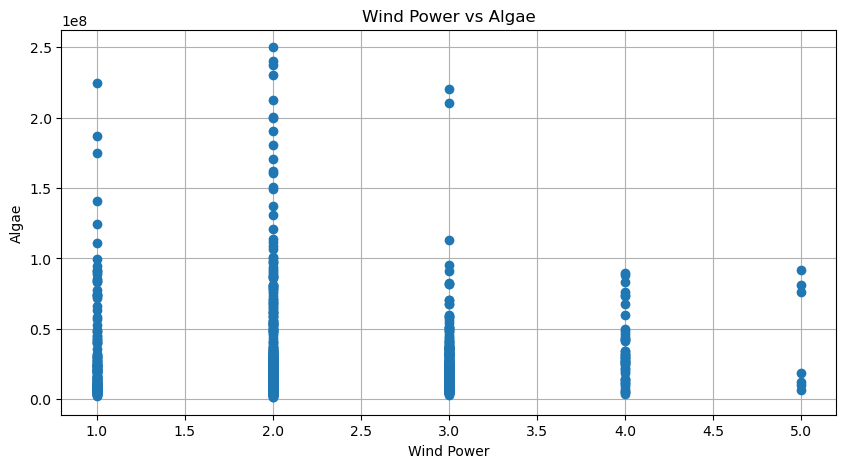

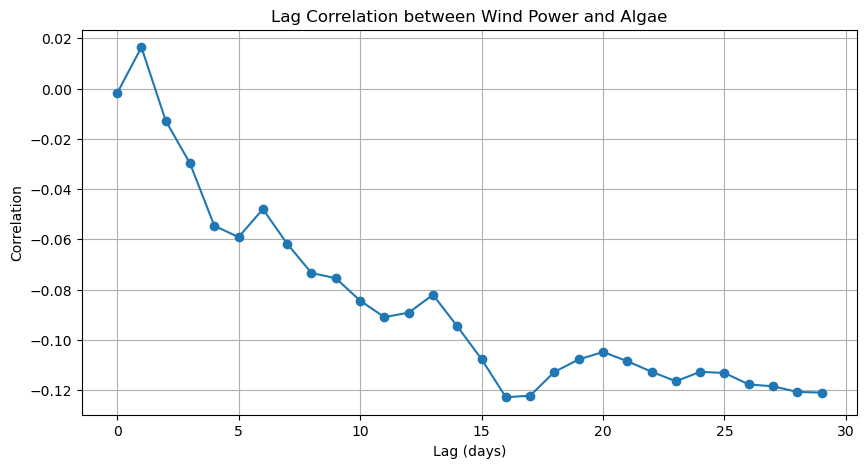

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 加载数据
data = pd.read_csv('/root/Download/AlgaeBloomForecast/merged_data.csv')

# 处理风力数据，提取数字部分
data['wind_power'] = data['wind_power'].str.extract('(\d+)').astype(int)

# 计算相关性
correlation, _ = pearsonr(data['wind_power'], data['algae'])
print(f"Correlation between wind power and algae: {correlation}")

# 检查滞后相关性，最多滞后10天
lags = range(0, 30)
correlations = []
for lag in lags:
    shifted_algae = data['algae'].shift(-lag)
    correlation, _ = pearsonr(data['wind_power'][:-lag], shifted_algae[:-lag]) if lag != 0 else pearsonr(data['wind_power'], shifted_algae)
    correlations.append(correlation)

# 找到最大相关性的滞后天数
max_corr = max(correlations, key=abs)
best_lag = correlations.index(max_corr)

print(f"Best lag: {best_lag} days with correlation: {max_corr}")

# 绘制风力与藻类的相关性图
plt.figure(figsize=(10, 5))
plt.plot(data['wind_power'], data['algae'], 'o')
plt.title('Wind Power vs Algae')
plt.xlabel('Wind Power')
plt.ylabel('Algae')
plt.grid(True)
plt.show()

# 绘制滞后相关性图
plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, marker='o')
plt.title('Lag Correlation between Wind Power and Algae')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

请你修改上述代码，我想分析4级以上的大风对蓝藻爆发的影响。有没有相关性？或者滞后的相关性？如果有滞后相关性的话，这种滞后相关性分别是几天？


最后，需要你绘制几张图。图片中不用出现中文

# 分析4级以上的大风对蓝藻爆发的影响

Correlation between wind power (4-5) and algae: 0.11193480578723308
Best lag for wind power (4-5): 12 days with correlation: 0.48538449102412323


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_10579/89337786.py:10: SyntaxWarning: invalid escape sequence '\d'
  data['wind_power'] = data['wind_power'].str.extract('(\d+)').astype(int)


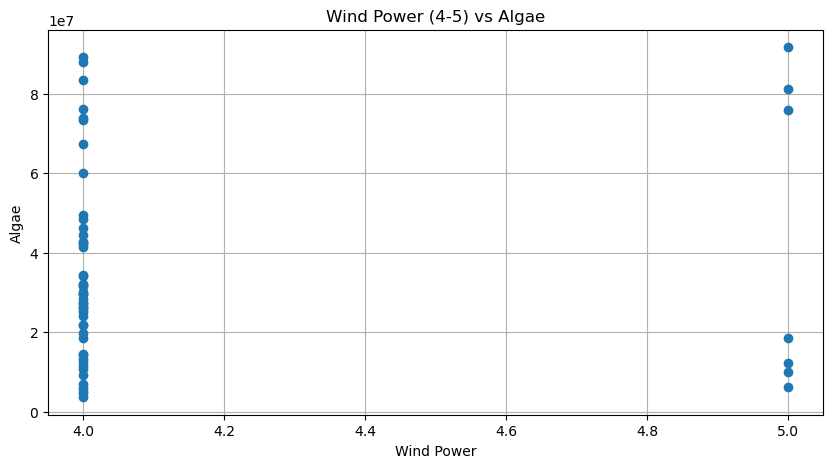

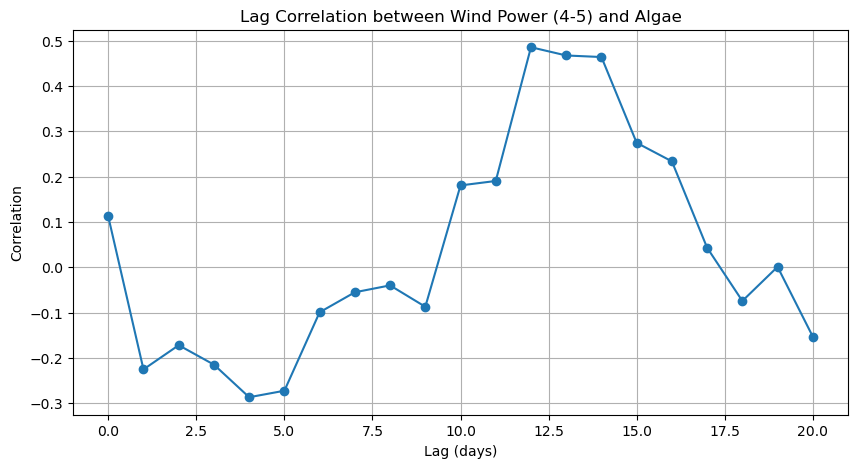

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 加载数据
data = pd.read_csv('/root/Download/AlgaeBloomForecast/merged_data.csv')

# 处理风力数据，提取数字部分
data['wind_power'] = data['wind_power'].str.extract('(\d+)').astype(int)

# 筛选4~5级风力的数据
data_mid_wind = data[(data['wind_power'] >= 4) ]

# 计算4~5级风力与藻类的相关性
correlation_mid, _ = pearsonr(data_mid_wind['wind_power'], data_mid_wind['algae'])
print(f"Correlation between wind power (4-5) and algae: {correlation_mid}")

# 检查滞后相关性，最多滞后20天
lags = range(0, 21)
correlations = []
for lag in lags:
    shifted_algae = data_mid_wind['algae'].shift(-lag)
    correlation, _ = pearsonr(data_mid_wind['wind_power'][:-lag], shifted_algae[:-lag]) if lag != 0 else pearsonr(data_mid_wind['wind_power'], shifted_algae)
    correlations.append(correlation)

# 找到最大相关性的滞后天数
max_corr = max(correlations, key=abs)
best_lag = correlations.index(max_corr)

print(f"Best lag for wind power (4-5): {best_lag} days with correlation: {max_corr}")

# 绘制4~5级风力与藻类的相关性图
plt.figure(figsize=(10, 5))
plt.plot(data_mid_wind['wind_power'], data_mid_wind['algae'], 'o')
plt.title('Wind Power (4-5) vs Algae')
plt.xlabel('Wind Power')
plt.ylabel('Algae')
plt.grid(True)
plt.show()

# 绘制滞后相关性图
plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, marker='o')
plt.title('Lag Correlation between Wind Power (4-5) and Algae')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

分析风力（wind_power）大于4级对蓝藻爆发的影响，并发现滞后2~6天为负相关，滞后10~16天为正相关，可能涉及多种环境和生态因素。以下是一些可能的解释：

风力对水体的混合作用：

当风力较强时，水体表层和底层可能会发生混合。这种混合可以将蓝藻从表层带到较深的水层，从而减少其在表层的浓度，导致短期内藻类数量下降（负相关）。
随着时间的推移，如果风力减弱，混合作用减少，蓝藻可能会重新上浮到水体表层，利用充足的阳光进行光合作用，从而恢复或增加数量（正相关）。

风力对营养盐的分布影响：

强风可能会导致水体中营养盐（如氮、磷）重新分布，短期内可能会降低藻类可利用的营养盐浓度，抑制藻类生长。
随着时间的推移，营养盐可能会在水体中重新积累，为藻类生长提供充足的营养，从而导致藻类数量增加。

风力对藻类生命周期的影响：

藻类的生命周期可能受到风力变化的影响。强风可能会破坏藻类细胞，导致其短期内死亡率增加。
随着时间的推移，藻类可能会适应新的环境条件，或者新的藻类细胞可能会在有利条件下生长，导致藻类数量的增加。

风力对水体温度的影响：

强风可能会导致水温下降，影响藻类的代谢活动，从而抑制其生长。
随着风力减弱和水温恢复，藻类的生长条件可能会改善，从而促进藻类生长。

其他环境因素：

其他环境因素，如光照、降雨、水体流动性等，也可能与风力变化相关，进而影响藻类的生长。

数据的季节性和周期性：

数据中可能存在季节性和周期性的变化，这些周期性变化可能与风力变化的周期相吻合，导致出现正负相关性。

需要注意的是，上述解释都是假设性的，并且实际情况可能更加复杂。要准确地确定风力变化对藻类爆发的影响机制，需要进行更深入的研究，包括实地观测、实验室实验和模型模拟等。此外，环境和生态系统是高度复杂和动态的，因此很难通过单一因素来解释所有的变化。